### Consumer Prices Indicator

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from joblib import dump, load


### Data Loading and Preprocessing

In [4]:
consumer_prices_indicators = pd.read_csv("../Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv")
consumer_prices_indicators.head()
print(consumer_prices_indicators.shape)


(112890, 17)


In [14]:
# Checking for missing values
missing_values = consumer_prices_indicators.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Year Code               0
Year                    0
Item Code               0
Item                    0
Months Code             0
Months                  0
Element Code            0
Element                 0
Unit                57663
Value                   0
Flag                    0
Flag Description        0
Note                55227
dtype: int64


In [15]:
# Handling missing values if any
consumer_prices_cleaned = consumer_prices_indicators.dropna(axis=0).reset_index(drop=True)
consumer_prices_cleaned

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Unit,Value,Flag,Flag Description,Note


In [16]:
# Handling missing values if any
consumer_prices_cleaned = consumer_prices_indicators.dropna(axis=1).reset_index(drop=True)
consumer_prices_cleaned

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Value,Flag,Flag Description
0,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,24.356332,I,Imputed value
1,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7002,February,6125,Value,23.636242,I,Imputed value
2,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7003,March,6125,Value,23.485345,I,Imputed value
3,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7004,April,6125,Value,24.767194,I,Imputed value
4,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7005,May,6125,Value,25.956912,I,Imputed value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112885,CP,Consumer Price Indices,716,Zimbabwe,2023,2023,23014,Food price inflation,7005,May,6121,Value,116.960656,E,Estimated value
112886,CP,Consumer Price Indices,716,Zimbabwe,2023,2023,23014,Food price inflation,7006,June,6121,Value,255.596454,E,Estimated value
112887,CP,Consumer Price Indices,716,Zimbabwe,2023,2023,23014,Food price inflation,7007,July,6121,Value,103.098144,E,Estimated value
112888,CP,Consumer Price Indices,716,Zimbabwe,2023,2023,23014,Food price inflation,7008,August,6121,Value,70.758637,E,Estimated value


### Converting Categorial colunm to numbers

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoders = {}

for col in consumer_prices_cleaned.columns:
    if consumer_prices_cleaned[col].dtype == 'object':
        consumer_prices_cleaned[col] = label_encoder.fit_transform(consumer_prices_cleaned[col])
        label_encoders[col] = label_encoder

from sklearn.preprocessing import MinMaxScaler

# Initialized MinMaxScaler
scaler = MinMaxScaler()

# Normalizing all columns
df_normalized = pd.DataFrame(scaler.fit_transform(consumer_prices_cleaned), columns=consumer_prices_cleaned.columns)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoders = {}

for col in consumer_prices_cleaned.columns:
    if consumer_prices_cleaned[col].dtype == 'object':
        consumer_prices_cleaned[col] = label_encoder.fit_transform(consumer_prices_cleaned[col])
        label_encoders[col] = label_encoder

from sklearn.preprocessing import MinMaxScaler

# Initialized MinMaxScaler
scaler = MinMaxScaler()

# Normalizing all columns
df_normalized = pd.DataFrame(scaler.fit_transform(consumer_prices_cleaned), columns=consumer_prices_cleaned.columns)

In [29]:
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.363636,1.0,0.0,2.206816e-11,0.75,0.75
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.272727,1.0,0.0,2.174608e-11,0.75,0.75
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.636364,1.0,0.0,2.167859e-11,0.75,0.75
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272727,0.000000,1.0,0.0,2.225192e-11,0.75,0.75
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.727273,1.0,0.0,2.278405e-11,0.75,0.75


### Model Training and Evaluation

In [33]:

# Select relevant features
selected_features = ['Area Code (M49)', 'Value', 'Domain Code',	'Domain', 'Area', 'Year Code', 'Year', 'Item Code', 'Item',	'Months Code', 'Months', 'Element Code', 'Element', 'Flag', 'Flag Description']
consumer_prices_selected = df_normalized[selected_features]


In [34]:
# Split the dataset into features (X) and target variable (y)
X = consumer_prices_selected[['Area Code (M49)', 'Domain Code', 'Domain', 'Area', 'Year Code', 'Year', 'Item Code', 'Item',	'Months Code', 'Months', 'Element Code', 'Element', 'Flag', 'Flag Description']]
y = consumer_prices_selected['Value']


In [35]:
X.head()

,Area Code (M49),Domain Code,Domain,Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.363636,1.0,0.0,0.75,0.75
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.272727,1.0,0.0,0.75,0.75
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.636364,1.0,0.0,0.75,0.75
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272727,0.000000,1.0,0.0,0.75,0.75
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.727273,1.0,0.0,0.75,0.75


In [36]:
# Split the dataset into training and testing sets (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### # Plot the relationship between each two variables to spot anything incorrect.

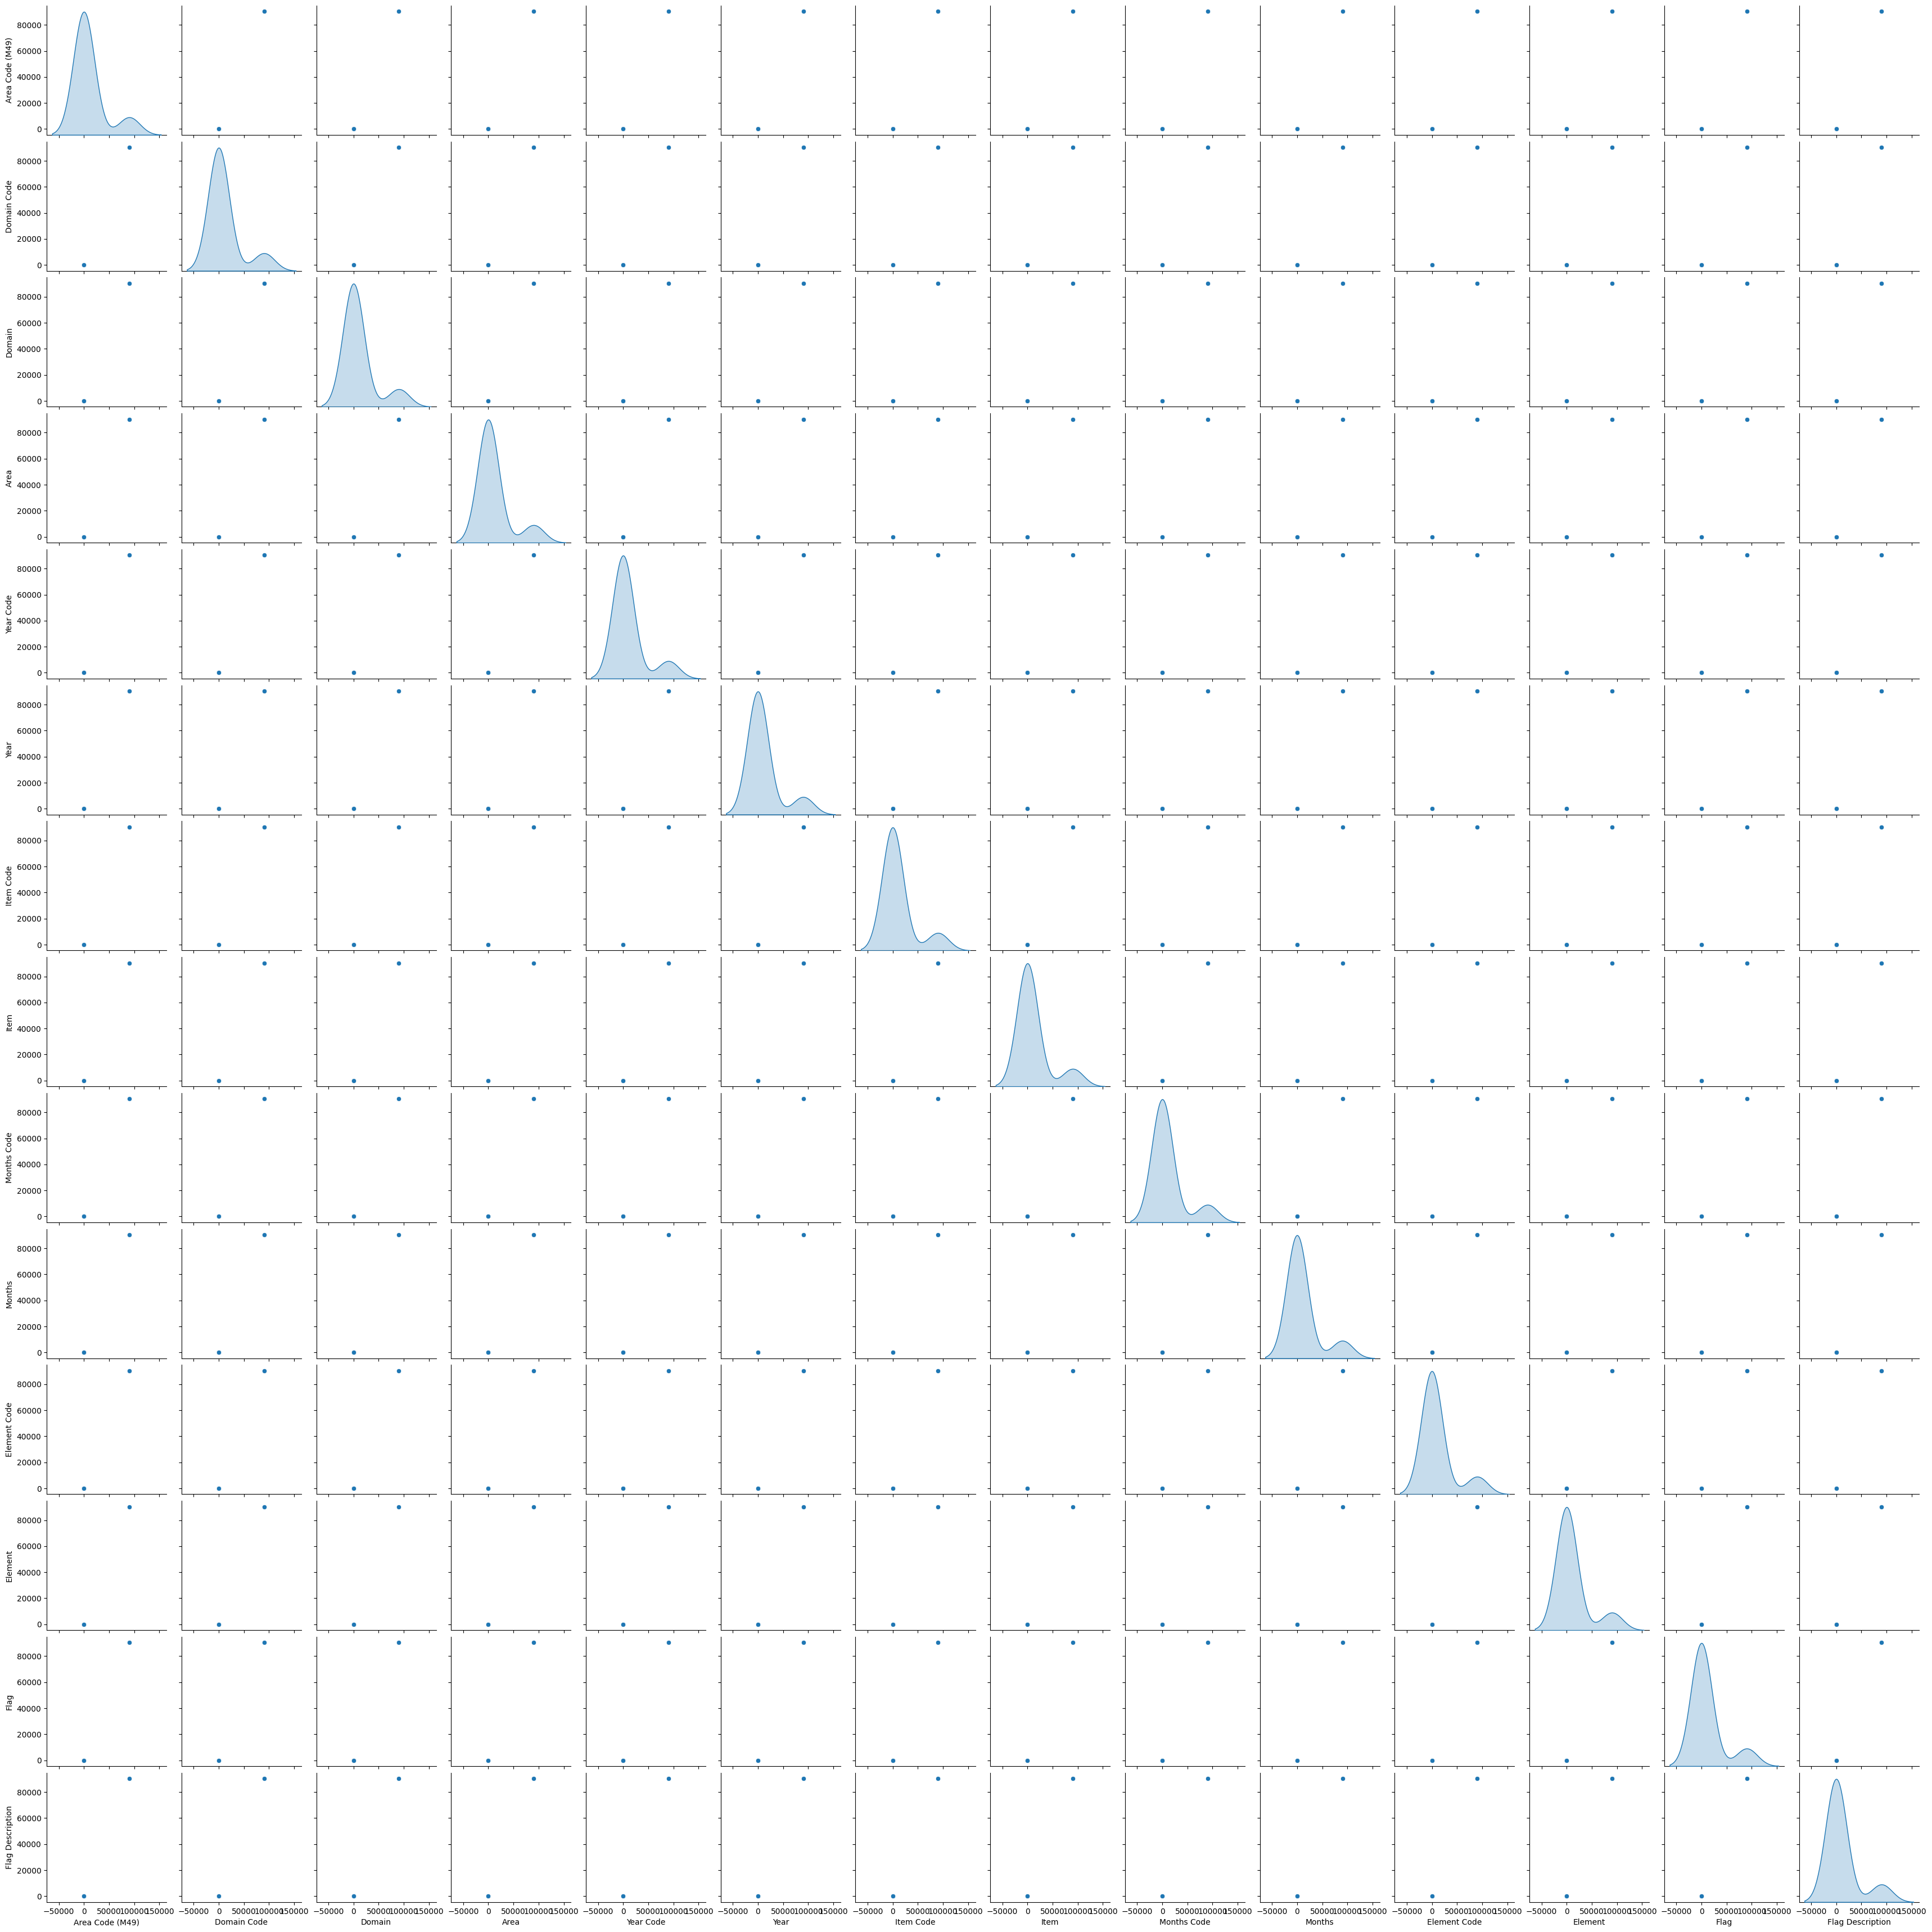

In [39]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = X_train.describe()
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [37]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)

Linear Regression Mean Squared Error: 5.528300867248012e-05
Linear Regression Mean Absolute Error: 0.00030840098948743054


In [40]:
# MLP Regression Model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train_scaled, y_train)
mlp_predictions = mlp_model.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
print("MLP Regression Mean Squared Error:", mlp_mse)
print("MLP Regression Mean Absolute Error:", mlp_mae)

MLP Regression Mean Squared Error: 6.814495778409962e-05
MLP Regression Mean Absolute Error: 0.0034464089243049817


### Model Evaluation Plots

<Figure size 1000x600 with 0 Axes>

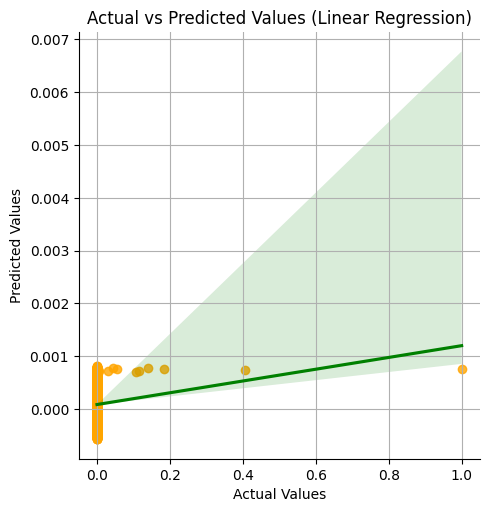

<Figure size 1000x600 with 0 Axes>

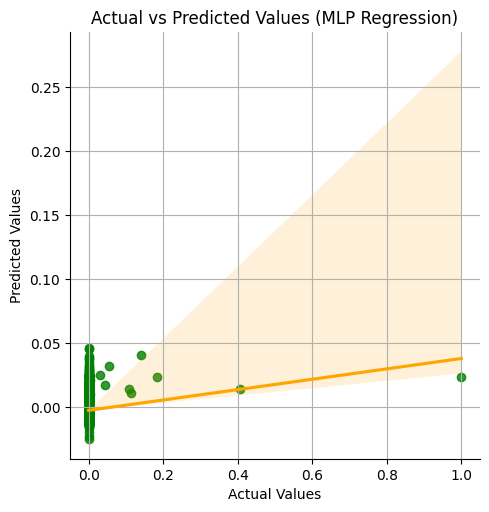

In [62]:

plot_data_lr = pd.DataFrame({'Actual': y_test, 'Predicted_LR': lr_predictions})
plot_data_mlp = pd.DataFrame({'Actual': y_test, 'Predicted_MLP': mlp_predictions})

# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=plot_data_lr, x='Actual', y='Predicted_LR', scatter_kws={'color': 'orange'}, line_kws={'color': 'green'})
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plot actual vs predicted values for MLP Regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=plot_data_mlp, x='Actual', y='Predicted_MLP', scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title('Actual vs Predicted Values (MLP Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


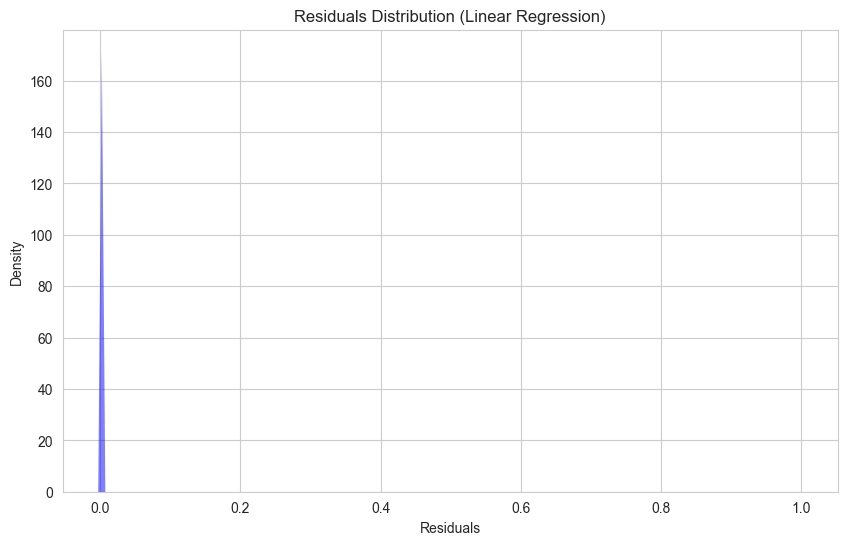

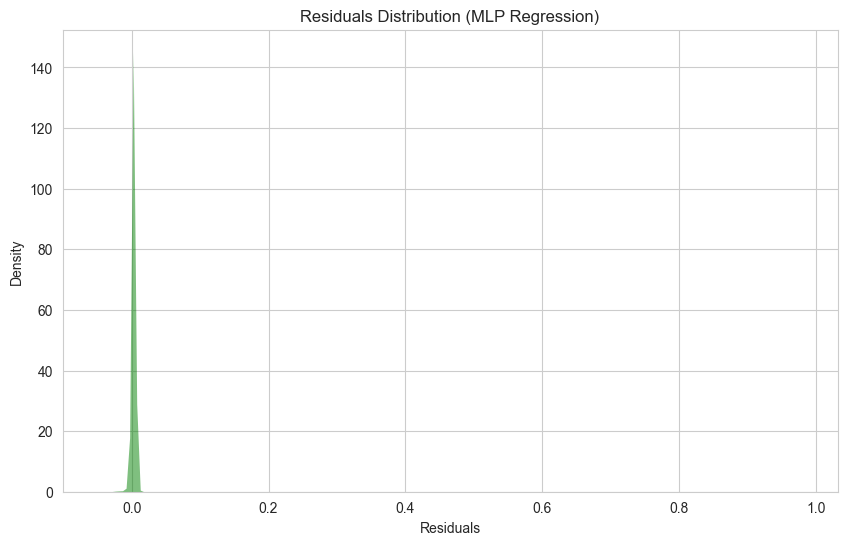

In [101]:
# Calculate residuals for Linear Regression
lr_residuals = y_test - lr_predictions

sns.set_style("whitegrid")

# Plot residuals for Linear Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(lr_residuals, color='blue', fill=True, alpha=0.5, linewidth=0)
plt.title('Residuals Distribution (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Calculate residuals for MLP Regression
mlp_residuals = y_test - mlp_predictions

# Plot residuals for MLP Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(mlp_residuals, color='green', fill=True, alpha=0.5, linewidth=0)
plt.title('Residuals Distribution (MLP Regression)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

### Cross-Validation

Linear Regression Cross-Validation RMSE Scores: [0.00257123 0.00778717 0.00691863 0.0112466  0.00657144]
Linear Regression Mean RMSE: 0.007019012524830915
MLP Cross-Validation RMSE Scores: [0.00303818 0.00810307 0.00821452 0.01146893 0.00664492]
MLP Mean RMSE: 0.007493924566449988


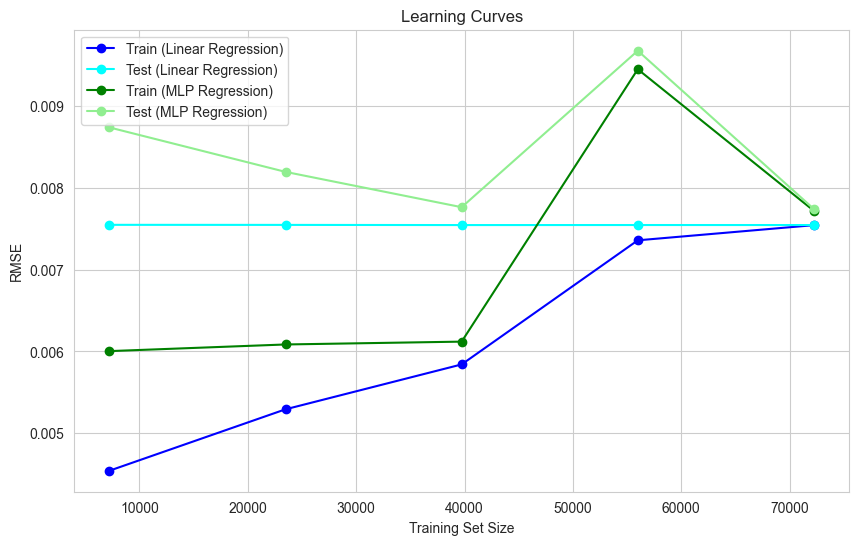

In [68]:
from sklearn.model_selection import cross_val_score, learning_curve

# Validate the models using cross-validation
lr_scores = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lr_rmse_scores = np.sqrt(-lr_scores)
print("Linear Regression Cross-Validation RMSE Scores:", lr_rmse_scores)
print("Linear Regression Mean RMSE:", lr_rmse_scores.mean())

mlp_scores = cross_val_score(mlp_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mlp_rmse_scores = np.sqrt(-mlp_scores)
print("MLP Cross-Validation RMSE Scores:", mlp_rmse_scores)
print("MLP Mean RMSE:", mlp_rmse_scores.mean())

# Plot learning curves
plt.figure(figsize=(10, 6))

# Learning curve for Linear Regression
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_rmse_lr = np.sqrt(-train_scores_lr.mean(axis=1))
test_rmse_lr = np.sqrt(-test_scores_lr.mean(axis=1))
plt.plot(train_sizes_lr, train_rmse_lr, 'o-', color='blue', label='Train (Linear Regression)')
plt.plot(train_sizes_lr, test_rmse_lr, 'o-', color='cyan', label='Test (Linear Regression)')

# Learning curve for MLP Regression
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(mlp_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_rmse_mlp = np.sqrt(-train_scores_mlp.mean(axis=1))
test_rmse_mlp = np.sqrt(-test_scores_mlp.mean(axis=1))
plt.plot(train_sizes_mlp, train_rmse_mlp, 'o-', color='green', label='Train (MLP Regression)')
plt.plot(train_sizes_mlp, test_rmse_mlp, 'o-', color='lightgreen', label='Test (MLP Regression)')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_normalized.drop(columns=['Area'], inplace=True)
df_normalized.head()

In [93]:
df_normalized.drop(columns=['Year Code'], inplace=True)
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Year,Item Code,Item,Months Code,Months,Element Code,Element,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.363636,1.0,0.0,2.206816e-11,0.75,0.75
1,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.272727,1.0,0.0,2.174608e-11,0.75,0.75
2,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.636364,1.0,0.0,2.167859e-11,0.75,0.75
3,0.0,0.0,0.0,0.0,0.0,0.0,0.272727,0.000000,1.0,0.0,2.225192e-11,0.75,0.75
4,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.727273,1.0,0.0,2.278405e-11,0.75,0.75


### Concatenate `Area` , `Year Code` Categorical Variable into the normalized data 

In [95]:
area_column = consumer_prices_indicators[['Area', 'Year Code']]

consumer_prices_indicators_area_concat = pd.concat([df_normalized, area_column], axis=1)

consumer_prices_indicators_area_concat.head()

,Domain Code,Domain,Area Code (M49),Year,Item Code,Item,Months Code,Months,Element Code,Element,Value,Flag,Flag Description,Area,Year Code
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.363636,1.0,0.0,2.206816e-11,0.75,0.75,Afghanistan,2000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.272727,1.0,0.0,2.174608e-11,0.75,0.75,Afghanistan,2000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.636364,1.0,0.0,2.167859e-11,0.75,0.75,Afghanistan,2000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.272727,0.000000,1.0,0.0,2.225192e-11,0.75,0.75,Afghanistan,2000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.727273,1.0,0.0,2.278405e-11,0.75,0.75,Afghanistan,2000


### Model Deployment

In [96]:
# Train a separate model for each geographical region and save them
regions = consumer_prices_indicators_area_concat['Area'].unique()
for region in regions:
    region_data = consumer_prices_indicators_area_concat[consumer_prices_indicators_area_concat['Area'] == region]
    X_region = region_data[['Year']]
    y_region = region_data['Value']
    
    model = LinearRegression()
    model.fit(X_region, y_region)
    

    # Save the trained model
    model_file = f'../model_deployment/model_consumer_prices_indicators/model_consumer_prices_indicators_{region}.joblib'
    dump(model, model_file)
    print(f"Model for {region} saved as {model_file}")

Model for Afghanistan saved as ../model_deployment/model_consumer_prices_indicators/model_consumer_prices_indicators_Afghanistan.joblib
Model for Åland Islands saved as ../model_deployment/model_consumer_prices_indicators/model_consumer_prices_indicators_Åland Islands.joblib
Model for Albania saved as ../model_deployment/model_consumer_prices_indicators/model_consumer_prices_indicators_Albania.joblib
Model for Algeria saved as ../model_deployment/model_consumer_prices_indicators/model_consumer_prices_indicators_Algeria.joblib
Model for Andorra saved as ../model_deployment/model_consumer_prices_indicators/model_consumer_prices_indicators_Andorra.joblib
Model for Angola saved as ../model_deployment/model_consumer_prices_indicators/model_consumer_prices_indicators_Angola.joblib
Model for Anguilla saved as ../model_deployment/model_consumer_prices_indicators/model_consumer_prices_indicators_Anguilla.joblib
Model for Antigua and Barbuda saved as ../model_deployment/model_consumer_prices_ind

Forecast for Afghanistan:
   Year  Forecasted_Value
0  2025      4.905023e-08
1  2026      4.907444e-08
2  2027      4.909866e-08

Forecast for Åland Islands:
   Year  Forecasted_Value
0  2025      1.490482e-08
1  2026      1.491217e-08
2  2027      1.491951e-08

Forecast for Albania:
   Year  Forecasted_Value
0  2025      3.341909e-08
1  2026      3.343558e-08
2  2027      3.345207e-08

Forecast for Algeria:
   Year  Forecasted_Value
0  2025      4.200161e-08
1  2026      4.202234e-08
2  2027      4.204307e-08

Forecast for Andorra:
   Year  Forecasted_Value
0  2025      1.746137e-08
1  2026      1.746997e-08
2  2027      1.747858e-08

Forecast for Angola:
   Year  Forecasted_Value
0  2025      1.657268e-07
1  2026      1.658087e-07
2  2027      1.658905e-07

Forecast for Anguilla:
   Year  Forecasted_Value
0  2025      2.569875e-08
1  2026      2.571142e-08
2  2027      2.572410e-08

Forecast for Antigua and Barbuda:
   Year  Forecasted_Value
0  2025      2.680521e-08
1  2026      2.

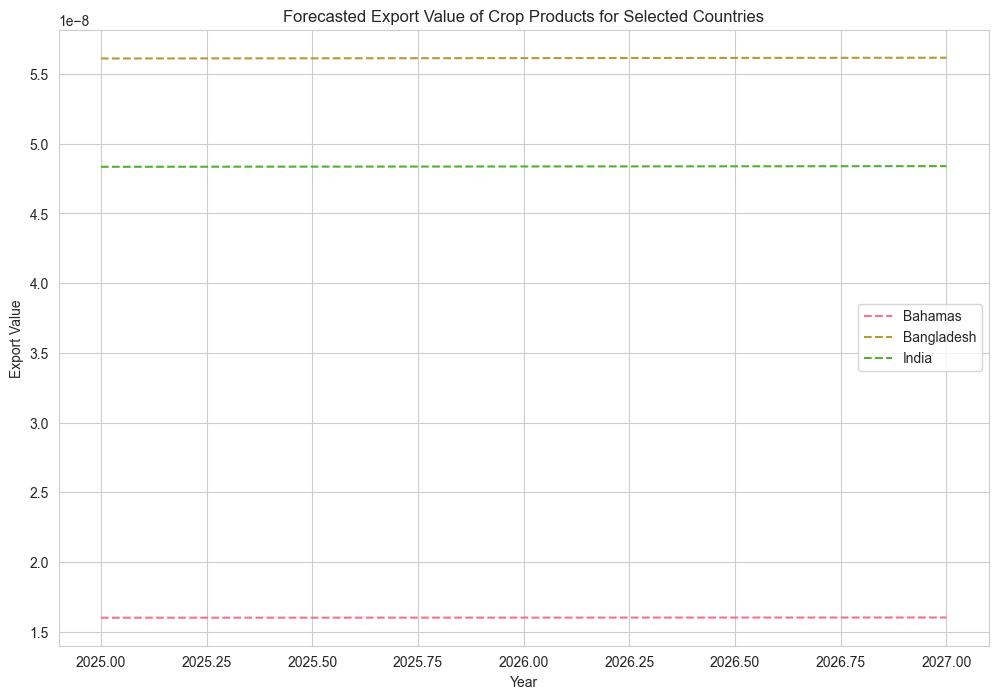

In [100]:
# Define a function to forecast the export value for a given region
def forecast_export_value(region, year):
    model = load(f'../model_deployment/model_consumer_prices_indicators/model_consumer_prices_indicators_{region}.joblib')
    forecast_years = [year + i for i in range(1, 4)]
    forecast_values = model.predict(pd.DataFrame({'Year': forecast_years}))
    forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecasted_Value': forecast_values})
    return forecast_df

# Perform forecasting for each geographical region
regions = consumer_prices_indicators_area_concat['Area'].unique()
forecast_results = {}   
for region in regions:
    forecast_results[region] = forecast_export_value(region, 2024)

# Display the forecast results for each region
for region, forecast_df in forecast_results.items():
    print(f"Forecast for {region}:")
    print(forecast_df)
    print()

sns.set_style("whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(12, 8))
countries_to_plot = ['Bahamas', 'Bangladesh', 'India']
for country in countries_to_plot:
    forecast_df = forecast_results[country]
    sns.lineplot(data=forecast_df, x='Year', y='Forecasted_Value', label=country, linestyle='--')

plt.title('Forecasted Export Value of Crop Products for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Export Value')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
pd.read_csv('../all_predictions.csv')

,Data Instance ID,True Label (Linear Regression),Prediction (Linear Regression),Data Instance ID.1,True Label (MLP Regression),Prediction (MLP Regression),Data Instance ID.2,True Label (Linear Regression).1,Prediction (Linear Regression).1,Data Instance ID.3,...,Prediction (Linear Regression).10,Data Instance ID.21,True Label (MLP Regression).10,Prediction (MLP Regression).10,Data Instance ID.22,True Label (Linear Regression).11,Prediction (Linear Regression).11,Data Instance ID.23,True Label (MLP Regression).11,Prediction (MLP Regression).11
0,89308.0,49.883683,7.923506e+07,89308.0,49.883683,3.768122e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105648.0,23.565986,2.154715e+08,105648.0,23.565986,4.952537e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,104284.0,5.474521,3.424414e+08,104284.0,5.474521,4.803364e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17620.0,-7.692308,4.369731e+08,17620.0,-7.692308,5.404083e+08,NaN,NaN,NaN,NaN,...,20674.526981,17620.0,75609.6,83696.893394,NaN,NaN,NaN,NaN,NaN,NaN
4,4656.0,106.920115,-1.408289e+08,4656.0,106.920115,-2.091771e+08,NaN,NaN,NaN,NaN,...,24316.581435,4656.0,24228.0,35383.057892,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22869.0,56.01,3167.844510,22869.0,56.01,851.258711
80370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11851.0,0.98,4620.939718,11851.0,0.98,4508.498243
80371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17652.0,0.00,3668.290266,17652.0,0.00,2453.595936
80372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,32492.0,16069.00,2921.203102,32492.0,16069.00,4126.815294


In [7]:
pd.read_csv('../all_predictions.csv').shape

(80374, 72)